
Tarea S11.01. Visualización de Datos con Python y Power BI

Descripción

Esta práctica integra el uso de Python con las librerías Pandas, Matplotlib, Seaborn o Plotly, así como su integración con Power BI. Trabajarás todo el proceso desde la conexión a MySQL, la creación de visualizaciones avanzadas en Python y finalmente la incorporación de estas visualizaciones a un informe dinámico en Power BI.

# **Nivel 1**

Conecta Python con MySQL Workbench y carga los datos de tu base de datos de Sprint 4 para utilizarlos en todos los ejercicios.

## N1.E01.

Conecta Python con MySQL Workbench y carga los datos de tu base de datos de Sprint 4 para utilizarlos en todos los ejercicios..

### N1.E01.1 Funciones auxiliares

In [40]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [41]:
def conectar_bd (name_bd:str)->tuple:
    """Intenta conectarse a una base de datos MySQL y devuelve los objetos de conexión y cursor asociados.

    Args:
        name_bd (str): Nombre de la BD a conectarse

    Returns:
        tuple: Una tupla (connection, cursor). Si la conexión falla, devuelve (None, None).
    """
    try:
        connection = mysql.connector.connect(host='localhost',
                                        database= name_bd,
                                        user='root',
                                        password='BDcurso_25')
        if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("You're connected to database: ", record)
            
            return connection, cursor

    except Error as e:
        print("Error while connecting to MySQL", e)        
        return None, None

In [42]:
def desconectar_bd(connection, cursor):
    """Cierra de forma segura el cursor y la conexión a la base de datos, siempre que ambos estén abiertos.

    Args:
        connection (_type_): Objeto de conexión MySQL
        cursor (_type_): Objeto cursor asociado a la conexión
    """
    try:
        if connection is not None and connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")
    except Error as e:
        print("Error while closing connection:", e)

    

In [43]:
def tablas_bd (cursor)->pd.DataFrame:
    """Obtiene los nombres de todas las tablas de la base de datos activa y los devuelve en un DataFrame de pandas.

    Args:
        cursor (_type_): Objeto cursor de MySQL utilizado para ejecutar la consulta

    Returns:
        pd.DataFrame: DataFrame con una columna llamada 'tabla' que contiene
        los nombres de todas las tablas. Si ocurre un error, devuelve un
        DataFrame vacío.
    """
    try:
        sql_select_Query = "SHOW TABLES"
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        return pd.DataFrame(records, columns=["tabla"])
    
    except Error as e:
        print("Error al obtener el nombre de todas las tablas:", e) 
        return pd.DataFrame() # Devuelve DF vacío si falla
    

In [44]:
def carga_tabla_en_df(cursor, name_tabla:str)->pd.DataFrame:
    """Carga todos los registros de una tabla de la base de datos en un DataFrame de pandas.

    Args:
        cursor (_type_): Objeto cursor de MySQL utilizado para ejecutar la consulta.
        name_tabla (str): Nombre de la tabla que se desea cargar

    Returns:
        pd.DataFrame: DataFrame con los datos de la tabla. 
        Si ocurre un error durante la ejecución de la consulta, se devuelve un DataFrame vacío.
    """
    
    try:
        sql_select_Query = f"select * from {name_tabla}"
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        columnas = cursor.column_names        
        return pd.DataFrame(records, columns=columnas)
    
    except Error as e:
        print(f"Error al cargar la tabla {name_tabla} en DF:", e) 
        return pd.DataFrame() # Devuelve DF vacío si falla

In [45]:
def ejecutar_nivel1_ejercicio_1(nom_bd)->dict:
    """Orquestador para le ejecución del ejercicio 1 del nivel 1
    Recibe el nombre de una Base de datos MySQL a conectarse y devuelve un diccionario con todos los DataFrames de cada tabla de la BD


    Args:
        nom_bd (_type_): Nombre de la Base de datos MySQL a conectarse

    Returns:
        dict: Diccionario con clave el nombre de la tabla y valor un DF con todos sus valores de todas sus columnas
    """
    # 1 Conectarme a la BD
    conexion, cursor = conectar_bd(nom_bd)

    # 2 Saber el nombre de las tablas de la BD
    df_tablas = tablas_bd(cursor)
    # display(df_tablas)
    
    # 3 Diccionario donde guardaremos todos los DataFrames 
    dic_dfs = {}

    # 4 Cargar todas las tabla en un DF cada una
    for nombre in df_tablas["tabla"]:
        nom = "df_" + nombre
        # print(nom)
        nom_valor = carga_tabla_en_df(cursor, nombre)
        dic_dfs[nom] = nom_valor
        # display(nom)

    # 5 desconectarme de la BD
    desconectar_bd(conexion, cursor)
    
    return dic_dfs

### N1-E01.2 Programa principal

In [46]:
nombre_bd = "transactions_2"

dic_dfs_tablas = ejecutar_nivel1_ejercicio_1(nombre_bd)

# Combierto a DF cada tabla del diccionario y la printo
for nombre, df in dic_dfs_tablas.items():
        nom_tabla = "df_tabla_" + nombre.replace("df_", "", 1)
        globals()[nom_tabla] = df # Para crear una variable con nombre generado en tiempo de ejecución
        print(f"\n===== {nom_tabla} =====") 
        display(globals()[nom_tabla].head(5))
        



Connected to MySQL Server version  8.0.42
You're connected to database:  ('transactions_2',)
MySQL connection is closed

===== df_tabla_companies =====


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r



===== df_tabla_credit_cards =====


,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcS-4857,276,XX4857591835292505850771,2314242385113924,1819,467,%B2314242385113924^LWCBUDLWCBUD^22060000000000...,%B2314242385113924=2410101518363164?,09/27/25
1,CcS-4858,277,XX8581768137002436094025,6582720299715533,3964,817,%B6582720299715533^TIQMVITIQMVI^24040000000000...,%B6582720299715533=2411101104546272?,12/28/28
2,CcS-4859,278,XX7826930491423553609370,8861684536289642,4983,277,%B8861684536289642^COFBGDCOFBGD^28020000000000...,%B8861684536289642=2502101761665371?,11/26/26
3,CcS-4860,279,XX5559590368835304645299,2481155515498459,6876,661,%B2481155515498459^TIUJTUTIUJTU^31040000000000...,%B2481155515498459=2602101514414395?,07/27/27
4,CcS-4861,280,XX2035182877195191627307,1308930301149557,5710,398,%B1308930301149557^HPOBNZHPOBNZ^33010000000000...,%B1308930301149557=2805101751305028?,04/25/26



===== df_tabla_credit_state =====


,card_id,card_state
0,CcS-4857,active
1,CcS-4858,active
2,CcS-4859,active
3,CcS-4860,active
4,CcS-4861,active



===== df_tabla_products =====


,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1,WH-4
1,2,Tarly Stark,$9.24,#919191,2,WH-3
2,3,duel tourney Lannister,$171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,$71.89,#111111,3,WH-1
4,5,skywalker ewok,$171.22,#dbdbdb,3.2,WH-0



===== df_tabla_total_users =====


,id,name,surname,phone,email,birth_date,country,city,postal_code,address,continent
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,New York,10001,348-7818 Sagittis St.,american
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,"Apr 30, 1984",United States,San Jose,95101,P.O. Box 773,american
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,"Sep 15, 1989",United States,San Jose,95101,Ap #644-8492 Sagittis St.,american
3,1000,Amkjrv,Qbulrxbp,+48-258-9936,amkjrv.qbulrxbp@example.com,"May 17, 1970",Germany,Stuttgart,70173,215 Qbulrxbp St,european
4,1001,Nfvrlb,Oydaiwbg,+94-121-2522,nfvrlb.oydaiwbg@example.com,"Mar 4, 1994",Germany,Cologne,50667,121 Oydaiwbg St,european



===== df_tabla_transactions =====


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.19992926158272,1.4355402821327607
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.59720554463741,12.22175994259365
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.757295899964348,-95.37963676492454
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.54888376797025,-113.50305274646564
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.20836951654172,5.690806474241335



===== df_tabla_transactions_products =====


,id_transactions_products,id_transaction,id_product
0,1,00043A49-2949-494B-A5DD-A5BAE3BB19DD,16
1,2,00043A49-2949-494B-A5DD-A5BAE3BB19DD,26
2,3,00043A49-2949-494B-A5DD-A5BAE3BB19DD,97
3,4,00043A49-2949-494B-A5DD-A5BAE3BB19DD,87
4,5,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,66


## N1.E02.

Para cada elemento, crea una vista adecuada según las variables especificadas. Interpreta los resultados según sus datos.

Recuerda: cuando selecciones las columnas, piensa siempre en el método que vas a utilizar e incluye las necesarias para la función de visualización que quieras utilizar .

 - Una variable numérica.
 - Dos variables numéricas.
 - Una variable categórica.
 - Una variable categórica y una numérica.
 - Dos variables categóricas.
 - Tres variables combinadas.
 - Crea un Pairplot.

### N1.E02.1 Funciones auxiliares

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

### N1-E02.2 Programa principal

#### 1.- Una variable numérica.

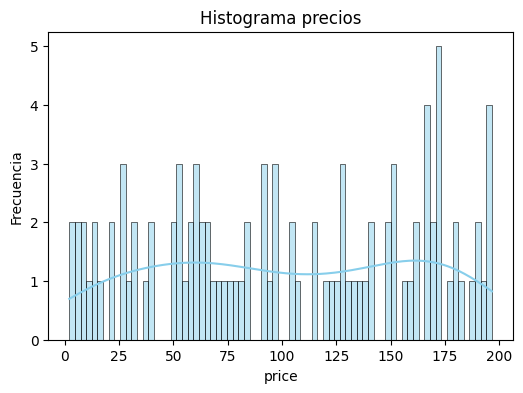

In [33]:
# UNA VARIABLE NUMERICA:
# tabla: df_tabla_products
# Columna: price

# print("******* Tabla: df_tabla_products ******")
# display(df_tabla_products.head(5))
# display(df_tabla_products.info())

# --- Histograma --- 
plt.figure(figsize=(6,4))

sns.histplot(
    df_tabla_products["price"].str.replace("$","").astype(float),
    bins=75,
    kde=True,                     # ← activa el KDE
    color="skyblue"
)

plt.title("Histograma precios")
plt.xlabel("price")
plt.ylabel("Frecuencia")
plt.show()




INTERPRETACION:

 - KDE indica como 3 grupos de productos por precio: baratos, medios y altos, concentrando menos productos en los de precios medios
 - Los picos de más pruductos pertenecen a productos caros

#### 2.- Dos variables numéricas.

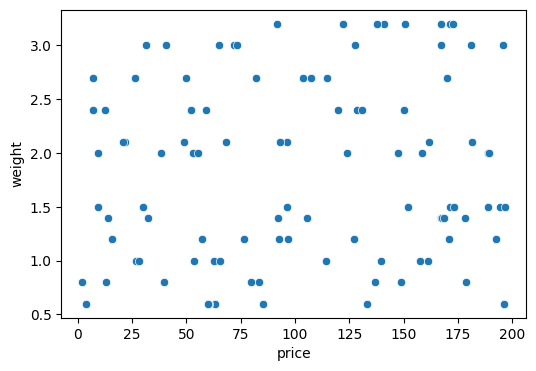

In [34]:
# DOS VARIABLES NUMERICAS:
# tabla: df_tabla_products
# ColumnaS: price y weight

# print("******* Tabla: df_tabla_products ******")
# display(df_tabla_products.head(5))
# display(df_tabla_products.info())

y= df_tabla_products["weight"].astype(float)
x = df_tabla_products["price"].str.replace("$","").astype(float)


# --- Scatter --- 
plt.figure(figsize=(6,4))
sns.scatterplot(
                data=df_tabla_products, 
                x = x, 
                y = y
                );

INTERPRETACION:

 - Los puntos están muy dispersos
 - No hay forma reconocible: Ni nube ascendente (correlación positiva) ni  nube descendente (correlación negativa)
 - El precio es mucho más disperso (el rango es mayor) que el peso
 - No hay clusters o grupos bien definidos
 - El precio no depende del peso del producto: Productos pesados no son necesariamente ni más caros, ni más baratos.

#### 3.- Una variable categórica.

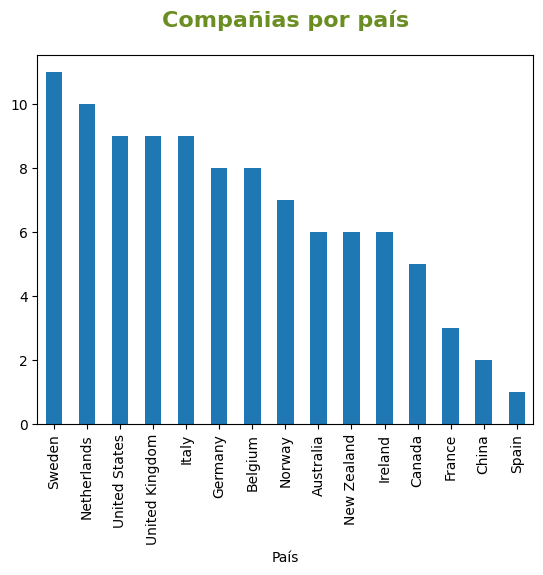

In [35]:
# UNA VARIABLE CATEGORICA:
# tabla: df_tabla_companies
# Columna: country

# print("******* Tabla: df_tabla_companies ******")
# display(df_tabla_companies.head(5))
# display(df_tabla_companies.info())

fig, ax = plt.subplots()
df_tabla_companies["country"].value_counts().plot(kind='bar', 
                                                    ax=ax,
                                                    stacked= True # PARA BARRAS APILADAS
                                                    )

ax.set_xlabel('País')
# ax.set_ylabel('Compañías')
ax.set_title("Compañias por país", fontsize=16, color='olivedrab', fontweight='bold', pad=20)
plt.show()


INTERPRETACION:

 - Hay como 3 grupos de paises por el número de compañías: Alto (Sweden a Italy), medio (Germany a Canada) y bajo (France a Spain)
 - No hay un equlibrio de compañías por país.
 - Hay muchas diferencia entre el grupo alto y el bajo.

#### 4.- Una variable categórica y una numérica.

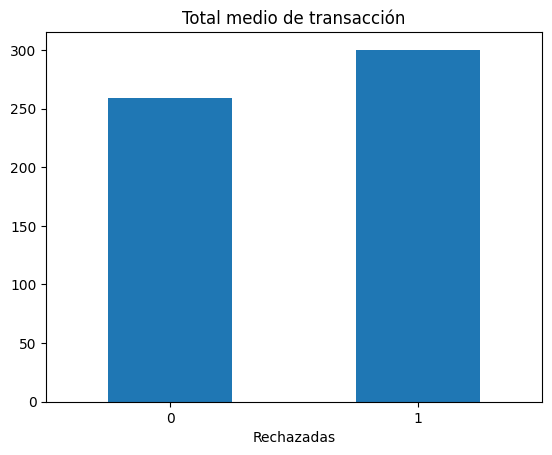

In [36]:
# UNA VARIABLE CATEGORICA Y UNA NUMERICA:
# tabla: df_tabla_transactions
# Columna categorica: declined
# Columna numerica: amount

# print("******* Tabla: df_tabla_transactions ******")
# display(df_tabla_transactions.head(5))
# display(df_tabla_transactions.info())

# display(df_tabla_transactions.groupby("declined")[["amount"]].mean().round(2))


ax = df_tabla_transactions.groupby("declined")[["amount"]].mean().plot.bar(
                                                                    title="Total medio de transacción",
                                                                    legend=False,
                                                                    xlabel="Rechazadas"
                                                                    );

plt.xticks(rotation=0)   # ← etiquetas horizontales
plt.show()

INTERPRETACION:

- Las transacciones rechazadas tienen un importe medio más alto.
- Podria sugerir que el importe si podria influir en la probabilidad de rechazo de la transacción.
- Revisar sistemas de control de pagos, riesgos, límites, etc.

#### 5.- Dos variables categóricas.

country,Canada,France,Germany,Italy,Netherlands,Poland,Portugal,Spain,Sweden,United Kingdom,United States
continent,,,,,,,,,,,
american,490,0,0,0,0,0,0,0,0,0,520
european,0,432,452,439,455,415,441,461,417,478,0


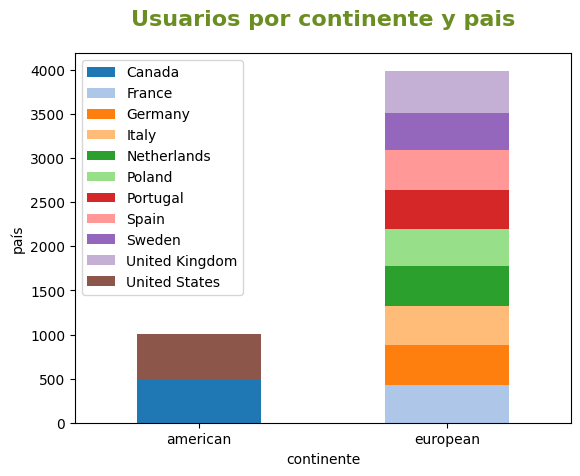

In [37]:
# DOS VARIABLES CATEGORICAS:
# tabla: df_tabla_total_users
# Columna categorica: continent
# Columna categorica: country

# print("******* Tabla: df_tabla_total_users ******")
# display(df_tabla_total_users.head(5))
# display(df_tabla_total_users.info())

fig, ax = plt.subplots()
df_cont_count = pd.crosstab(df_tabla_total_users["continent"], df_tabla_total_users["country"])
display(df_cont_count)

df_cont_count.plot(kind='bar', 
                        ax=ax,
                        stacked= True, # PARA BARRAS APILADAS
                        color=sns.color_palette("tab20", n_colors=df_cont_count.shape[1]) # ← más colores                        
                        )

ax.set_xlabel('continente')
ax.set_ylabel('país')
ax.legend(title='')

ax.set_title("Usuarios por continente y pais", fontsize=16, color='olivedrab', fontweight='bold', pad=20)
plt.xticks(rotation=0)   # ← etiquetas horizontales
plt.show()

INTERPRETACION:

 - Claramente hay muchos más usuarios en Europa que en America.
 - En America hay presencia en 2 países mientras que en Europa hay en 9 países.
 - Europa tiene más usuarios y esta más diversificada por países.
 - El número de usuarios en cada país de Europa es similar.

#### 6.- Tres variables combinadas.

In [38]:
# TRES VARIABLES COMBINADAS:
# tabla: df_tabla_transactions
# categoricas: user_id y declined
# numerica: nº de transacciones

# print("******* Tabla: df_tabla_products ******")
# display(df_tabla_transactions.head(5))
# display(df_tabla_transactions.info())

df_temp=(df_tabla_transactions.groupby(["user_id", "declined"])[["id"]].count().round(2).reset_index())

df_temp["declined"] = df_temp["declined"].astype("object")
df_temp["user_id"] = df_temp["user_id"].astype(int)
df_temp.rename(columns={"id":"Nº_transacciones"}, inplace=True)


fig = px.scatter(df_temp, 
                x="user_id",
                y="Nº_transacciones", 
                color="declined", 
                title="Nº transacciones por usuario",
                color_discrete_map={ 0: "green", 1: "red"}             
                )
fig.update_xaxes(title="Usuario")
fig.update_yaxes(title="Número de transacciones")

fig.show()



INTERPRETACION:

 - Hay muchas mas transacciones aceptadas que rechazadas.
 - hay usuarios que tienen aceptadss y alguna rechazada, pero muy pocas si las comparamos, por lo que no parece dependa del usuario.
 - Los rechazos se dan en los usuarios con id más pequeño, que podrian ser los primeros que compraron cuando nacio la compañia (ver fecha de rechazos).
 - Los rechazo se dan cuando hay mayor número de transacciones. Podria haber un limite al número de transacciones por cliente en 40 (Revisar)

#### 7.- Crea un Pairplot

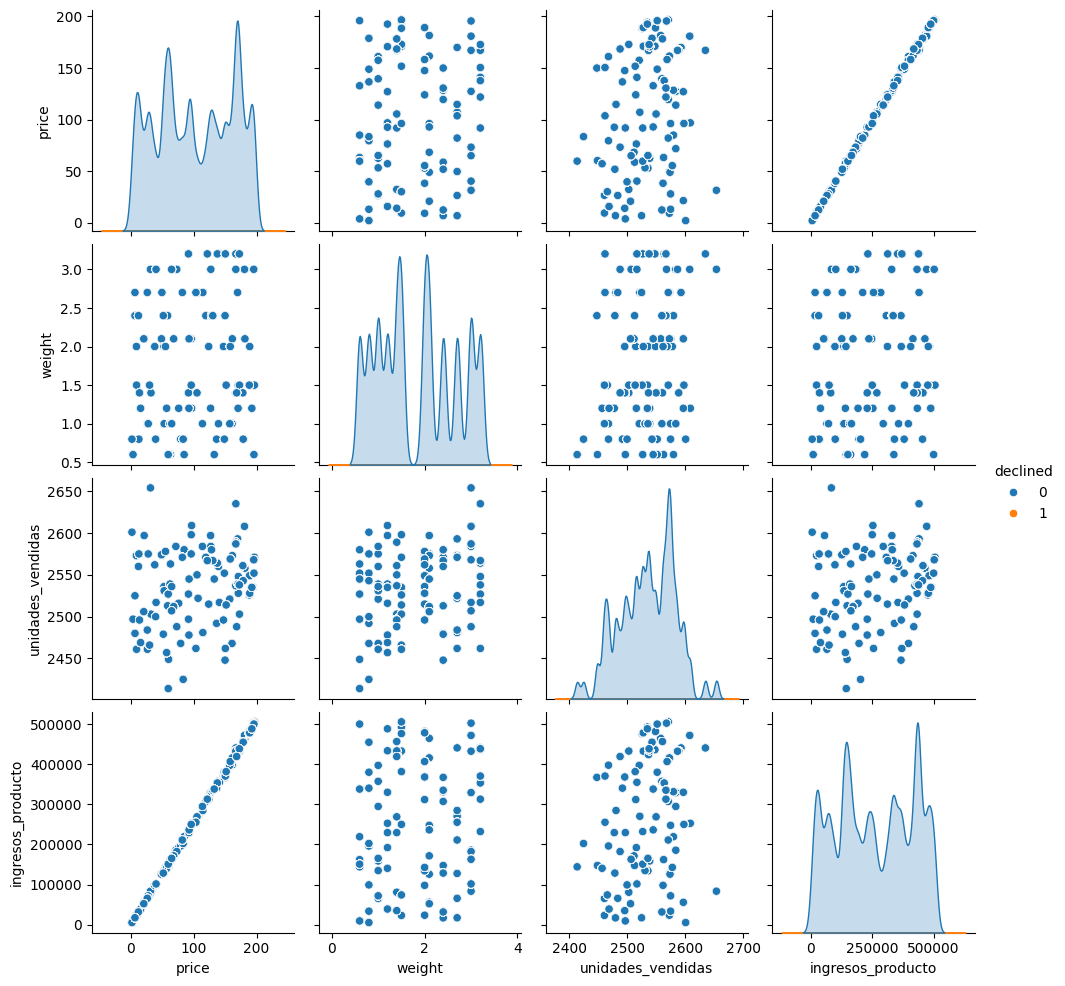

In [48]:
# Usare 4 variables numericas y una categorica


# JOIN de transactions y transactions_products para tener cada ide de producto asociado a un pedido declined o no
df_total = pd.merge(df_tabla_transactions, 
                    df_tabla_transactions_products, 
                    left_on="id",
                    right_on="id_transaction"
                    )


# hago un df con agrupacion de la id de producto y las veces que se ha vendido. Le cambio el nombre para mayor claridad
df_1 = df_tabla_transactions_products.groupby(["id_product"])[["id_transactions_products"]].count()
df_1.rename(columns={"id_transactions_products":"unidades_vendidas"}, inplace=True)
df_1


# hago un JOIN de la tabla productos con la que acabo de crear para tener todas las columnas de procdutos y la de unidades vendidas
df_2 = pd.merge(df_tabla_products, 
                    df_1, 
                    left_on="id",
                    right_on="id_product"
                    )
#Convierto las variables numericas de object a float y añado la columna de ingresos por producto vendido
df_2["price"] = df_2["price"].str.replace("$","").astype(float)
df_2["weight"] = df_2["weight"].astype(float)
df_2["ingresos_producto"] = (df_2["price"] * df_2["unidades_vendidas"]).round(2)


#JOIN de la tabla anterior con la total para tener todas las variables numericas y la categorica ·declined) en un mismo DF
df_3 = pd.merge(df_2, 
                    df_total, 
                    left_on="id",
                    right_on="id_product"
                    )
# Convierto la variable categorica de integer a object
df_3["declined"] = df_3["declined"].astype(object)


# Dibujo el pairplor solo de las columnas con las variables consideradas
sns.pairplot(
    df_3,
    vars=["price", "weight", "unidades_vendidas", "ingresos_producto"],
    hue="declined"
)

plt.show()

INTERPRETACION:

  - price — weight: 
    - Puntos bastante dispersos => No hay tendencia clara ni ascendente ni descendente.
    - El precio del producto no depende del peso
    - Ni precio ni peso influyen en declained al no apreciarse puntos con declained
  - price — unidades_vendidas:
    - Los puntos no forman una nube clara ni hay una pendiente evidente
    - El precio no parece influir en cuantas unidades que se venden
    - Ni precio ni unidades vendidas influyen en declained al no apreciarse puntos con declained
  - price — ingresos_producto:
    - Relación muy clara ascendente, formando los puntos casi una linea recta con pendiente positiva
    - Ingresos producto depende directamente del precio. Si el precio sube los ingresos suben proporcionalmente
    - Declined no depende de los ingresos al no apreciarse puntos con declained.
  - weight — unidades_vendidas:
    - Dispersion total sin patrón.
    - El peso del producto no influye en cuántas unidades se venden.
    - Declined no depende del peso ni de las ventas al no apreciarse puntos con declained.
  - weight — ingresos_producto:
    - Dispersion total sin patrón.
    - El peso no influye en los ingresos del producto.
    - Declined no depende del peso ni de los ingresos al no apreciarse puntos con declained.
  - unidades_vendidas — ingresos_producto:
    - Relación ascendente, cuantas más unidades se veneden más ingresos se generan => Correlación fuerte
    - Relación directa y lógica: ingresos = unidades × precio.
    - Declined no depende del volumen de ventas ni de los ingresos al no apreciarse puntos con declained.
  - Diagonales (distribuciones individuales):
    - Price: El pico más alto es de productos más caros y hay otro pico de precios mas baratos
    - weight: Aparecen como 2 grupos de pesos
    - unidades_vendidas: Distribucion sesgada a la derecha => Muchos productos se venden poco y pocos productos se venden mucho (posibles outliers)
    - ingresos_producto: Muy parecida a precio con 2 picos destacados
    - declined: No parece depender de ninguna de estas variables numericas y puede depender de otras categoricas como proveedor, fecha, pais, etc.


# **Nivel 2**

## N2.E01.

 Representa la correlación de algunas variables e interpreta los resultados según tus datos.

### N2.E01.1 Programa principal

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

,price,weight,unidades_vendidas,ingresos_producto
0,161.11,1.0,2468,397619.48
1,161.11,1.0,2468,397619.48
2,161.11,1.0,2468,397619.48
3,161.11,1.0,2468,397619.48
4,161.11,1.0,2468,397619.48


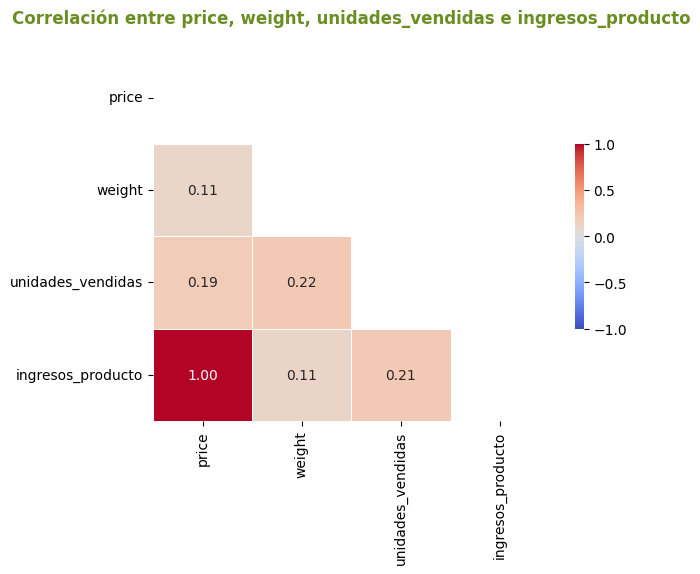

In [18]:
# Voy a hacer la correlacion de las variables numericas del pairplot del ejercicio anterior
# Las variables son: "price", "weight", "unidades_vendidas", "ingresos_producto"
# creo el DF con solo estas variables o columnas

# ****** IMPORTANTE: Antes hay que ejecutar el código del Nivel 1, Ejercicio 2, "7.- Crea un pairplot"

columnas = ["price", "weight", "unidades_vendidas", "ingresos_producto"]
df_numericas = df_3[columnas]
display(df_numericas.head(5))



# Calcula la matriz de correlacion de df
df_correlacion = df_numericas.corr()
# df_correlacion


# df_correlacion = df_numericas.corr()
f, ax = plt.subplots()

mask = np.triu(np.ones_like(df_correlacion, dtype=bool))

sns.heatmap(df_correlacion, 
            mask=mask, 
            annot=True, 
            center=0,  # ← 0 será el color central (blanco)
            vmin=-1,   # ← límite inferior
            vmax=1,    # ← límite superior
            fmt=".2f",
            cmap="coolwarm", # o cualquier paleta divergente
            linewidths=.5, 
            cbar_kws={"shrink": .5}
        )

ax.set_title("Correlación entre price, weight, unidades_vendidas e ingresos_producto", color='olivedrab', ha='center', fontweight='bold', pad=20)
plt.show()

INTERPRETACION:

 - price — ingresos_producto:
    - Correlacion de 1 indica fuerte correlacion positiva de ambas variables
    - Debido a que ingresos_producto = price × unidades_vendidas
    - Ingresos producto depende directamente del precio. Si el precio sube los ingresos suben proporcionalmente
 -  weight — unidades_vendidas:
    - Practicamente sin correlación al tener un valor de 0.11 muy cercano al cero
 - Resto de correlaciones son todas positivas pero muy debiles, por lo que habria muy poca relacion entre ambas variables de cada par

## N2.E02.

Implementa un Jointplot per explorar la relació entre dues variables i interpreta els resultats segons les teves dades.

### N2-E02.1 Programa principal

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

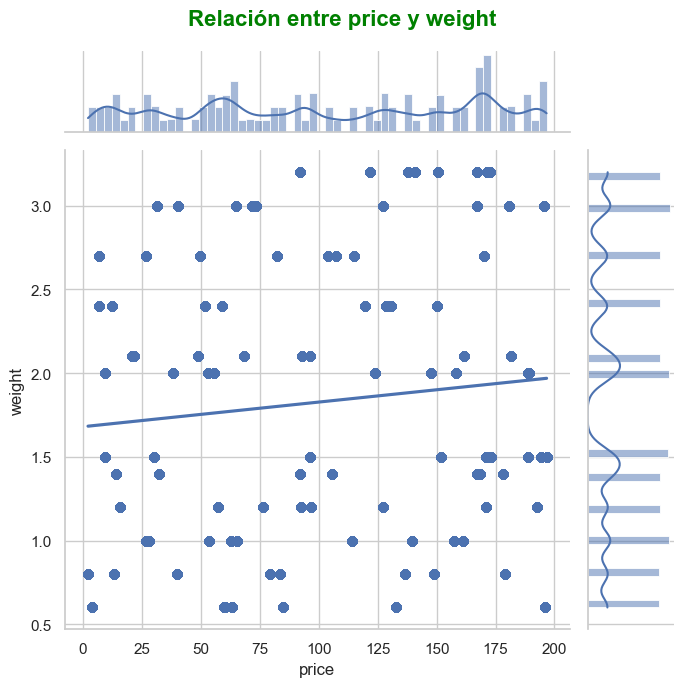

In [20]:
# Voy a usar 2 de las variables numéricas del pairplot del ejercicio 2 del Nivel 1
# Las variables son: "price" y "weight"
# El DF que uso es el creado en el ejercicio 2 del Nivel 1: df_3

# ****** IMPORTANTE: Antes hay que ejecutar el código del Nivel 1, Ejercicio 2, "7.- Crea un pairplot"


sns.set_theme(style="whitegrid")
g =  sns.jointplot(x="price", y="weight", data=df_3, kind="reg", height=7)

g.set_axis_labels("price", "weight", fontsize=12)
plt.subplots_adjust(top=0.9) 
plt.suptitle("Relación entre price y weight", fontsize=16, color='green', fontweight='bold', ha='center')
plt.tight_layout() 
plt.show()

INTERPRETACION:

 - Gráfico central:
    - Puntos bastante dispersos y línea de regresión con ligera pendiente positiva, pero muy suave.
    - Relacion Precio-peso es muy débil.
    - A medida que el peso aumenta, el precio tiende a subir, pero muy poco. El peso NO explica el precio de forma clara.
 - Histograma superior (price):
    - Distribución de pesos muy amplia, habiendo muchos productos en un rango médio.
    - No esta concentrado en un unico valor de precio.
    - El precio varia bastante entre productos.
 - Histograma derecha (weight):
    - Peso concentrado en un rango más estrecho (0.5 a 3.0 aprox.). Poca variabilidad.
    - Podria haber un grupo de productos de menos de 1.5 Kgr y otros de más.
    - No hay valores extremos.
- Conclusion global:
    - Precio y peso no estan correlacionados de forma significativa (línea de regresión casi plana).
    - El precio varia mucho entre productos, pero esa variación no depende del peso.
    - El peso es bastante homogeneo (por eso no puede explicardiferencias grandes en el precio).

# **Nivel 3**

## N3.E01.

 Transfiere todas las visualizaciones del Nivel 1 a Power BI utilizando scripts de Python.

 Recuerda: cuando cargues tus dataframes en Power BI, asegúrate de incluir una columna identificadora o una combinación de columnas que garantice la unicidad de cada registro. Por defecto, Power BI elimina duplicados y podrías perder información .

#### 0.- Carga de datos en power Bi

In [ ]:
# PARTE COMUN A TODOS LOS SCRIPTs, ELIMINANDO LOS PRINTS Y DISPLAY

import mysql.connector
from mysql.connector import Error
import pandas as pd


def conectar_bd (name_bd:str)->tuple:
    """Intenta conectarse a una base de datos MySQL y devuelve los objetos de conexión y cursor asociados.

    Args:
        name_bd (str): Nombre de la BD a conectarse

    Returns:
        tuple: Una tupla (connection, cursor). Si la conexión falla, devuelve (None, None).
    """
    try:
        connection = mysql.connector.connect(host='localhost',
                                        database= name_bd,
                                        user='root',
                                        password='BDcurso_25')
        if connection.is_connected():
            db_Info = connection.get_server_info()
            # print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            # print("You're connected to database: ", record)
            
            return connection, cursor

    except Error as e:
        print("Error while connecting to MySQL", e)        
        return None, None

def desconectar_bd(connection, cursor):
    """Cierra de forma segura el cursor y la conexión a la base de datos, siempre que ambos estén abiertos.

    Args:
        connection (_type_): Objeto de conexión MySQL
        cursor (_type_): Objeto cursor asociado a la conexión
    """
    try:
        if connection is not None and connection.is_connected():
            cursor.close()
            connection.close()
            # print("MySQL connection is closed")
    except Error as e:
        print("Error while closing connection:", e)

def tablas_bd (cursor)->pd.DataFrame:
    """Obtiene los nombres de todas las tablas de la base de datos activa y los devuelve en un DataFrame de pandas.

    Args:
        cursor (_type_): Objeto cursor de MySQL utilizado para ejecutar la consulta

    Returns:
        pd.DataFrame: DataFrame con una columna llamada 'tabla' que contiene
        los nombres de todas las tablas. Si ocurre un error, devuelve un
        DataFrame vacío.
    """
    try:
        sql_select_Query = "SHOW TABLES"
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        return pd.DataFrame(records, columns=["tabla"])
    
    except Error as e:
        print("Error al obtener el nombre de todas las tablas:", e) 
        return pd.DataFrame() # Devuelve DF vacío si falla

def carga_tabla_en_df(cursor, name_tabla:str)->pd.DataFrame:
    """Carga todos los registros de una tabla de la base de datos en un DataFrame de pandas.

    Args:
        cursor (_type_): Objeto cursor de MySQL utilizado para ejecutar la consulta.
        name_tabla (str): Nombre de la tabla que se desea cargar

    Returns:
        pd.DataFrame: DataFrame con los datos de la tabla. 
        Si ocurre un error durante la ejecución de la consulta, se devuelve un DataFrame vacío.
    """
    
    try:
        sql_select_Query = f"select * from {name_tabla}"
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        columnas = cursor.column_names        
        return pd.DataFrame(records, columns=columnas)
    
    except Error as e:
        print(f"Error al cargar la tabla {name_tabla} en DF:", e) 
        return pd.DataFrame() # Devuelve DF vacío si falla

def ejecutar_nivel1_ejercicio_1(nom_bd)->dict:
    """Orquestador para le ejecución del ejercicio 1 del nivel 1
    Recibe el nombre de una Base de datos MySQL a conectarse y devuelve un diccionario con todos los DataFrames de cada tabla de la BD


    Args:
        nom_bd (_type_): Nombre de la Base de datos MySQL a conectarse

    Returns:
        dict: Diccionario con clave el nombre de la tabla y valor un DF con todos sus valores de todas sus columnas
    """
    # 1 Conectarme a la BD
    conexion, cursor = conectar_bd(nom_bd)

    # 2 Saber el nombre de las tablas de la BD
    df_tablas = tablas_bd(cursor)
    # display(df_tablas)
    
    # 3 Diccionario donde guardaremos todos los DataFrames 
    dic_dfs = {}

    # 4 Cargar todas las tabla en un DF cada una
    for nombre in df_tablas["tabla"]:
        nom = "df_" + nombre
        # print(nom)
        nom_valor = carga_tabla_en_df(cursor, nombre)
        dic_dfs[nom] = nom_valor
        # display(nom)

    # 5 desconectarme de la BD
    desconectar_bd(conexion, cursor)
    
    return dic_dfs

nombre_bd = "transactions_2"

dic_dfs_tablas = ejecutar_nivel1_ejercicio_1(nombre_bd)

# Combierto a DF cada tabla del diccionario y la printo
for nombre, df in dic_dfs_tablas.items():
        nom_tabla = "df_tabla_" + nombre.replace("df_", "", 1)
        globals()[nom_tabla] = df # Para crear una variable con nombre generado en tiempo de ejecución
        # print(f"\n===== {nom_tabla} =====") 
        # nom_tabla["unique_id"] = range(1, len(nom_tabla) + 1)
        # display(globals()[nom_tabla].head(5))
        



#### 1.- Una variable numérica.

In [ ]:
# UNA VARIABLE NUMERICA:
# tabla: df_tabla_products
# Columna: price

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# --- Histograma --- 
plt.figure(figsize=(6,4))

sns.histplot(
    dataset["price"].str.replace("$","").astype(float),
    bins=75,
    kde=True,                     # ← activa el KDE
    color="skyblue"
)

plt.title("Histograma precios")
plt.xlabel("price")
plt.ylabel("Frecuencia")
plt.show()


#### 2.- Dos variables numéricas.

In [ ]:
# DOS VARIABLES NUMERICAS:
# tabla: df_tabla_products
# ColumnaS: price y weight


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

y= dataset["weight"].astype(float)
x = dataset["price"].str.replace("$","").astype(float)


# --- Scatter --- 
plt.figure(figsize=(6,4))
sns.scatterplot(
                data=dataset, 
                x = x, 
                y = y
                );

plt.show()

#### 3.- Una variable categórica.

In [ ]:
# UNA VARIABLE CATEGORICA:
# tabla: df_tabla_companies
# Columna: country

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

fig, ax = plt.subplots()
dataset["country"].value_counts().plot(kind='bar', 
                                                    ax=ax,
                                                    stacked= True # PARA BARRAS APILADAS
                                                    )

ax.set_xlabel('País')
# ax.set_ylabel('Compañías')
ax.set_title("Compañias por país", fontsize=16, color='olivedrab', fontweight='bold', pad=20)
plt.show()


#### 4.- Una variable categórica y una numérica.

In [ ]:
# UNA VARIABLE CATEGORICA Y UNA NUMERICA:
# tabla: df_tabla_transactions
# Columna categorica: declined
# Columna numerica: amount

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ax = dataset.groupby("declined")[["amount"]].mean().plot.bar(
                                                                    title="Total medio de transacción",
                                                                    legend=False,
                                                                    xlabel="Rechazadas"
                                                                    );

plt.xticks(rotation=0)   # ← etiquetas horizontales
plt.show()

#### 5.- Dos variables categóricas.

In [ ]:
# DOS VARIABLES CATEGORICAS:
# tabla: df_tabla_total_users
# Columna categorica: continent
# Columna categorica: country

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

fig, ax = plt.subplots()
dataset = pd.crosstab(dataset["continent"], dataset["country"])
# display(dataset)

dataset.plot(kind='bar', 
                        ax=ax,
                        stacked= True, # PARA BARRAS APILADAS
                        color=sns.color_palette("tab20", n_colors=dataset.shape[1]) # ← más colores                        
                        )

ax.set_xlabel('continente')
ax.set_ylabel('país')
ax.legend(title='')

ax.set_title("Usuarios por continente y pais", fontsize=16, color='olivedrab', fontweight='bold', pad=20)
plt.xticks(rotation=0)   # ← etiquetas horizontales
plt.show()

#### 6.- Tres variables combinadas.

In [ ]:
# TRES VARIABLES COMBINADAS:
# tabla: df_tabla_transactions
# categoricas: user_id y declined
# numerica: nº de transacciones

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

dataset=(dataset.groupby(["user_id", "declined"])[["id"]].count().round(2).reset_index())

dataset["declined"] = dataset["declined"].astype("object")
dataset["user_id"] = dataset["user_id"].astype(int)
dataset.rename(columns={"id":"Nº_transacciones"}, inplace=True)


fig = px.scatter(dataset, 
                x="user_id",
                y="Nº_transacciones", 
                color="declined", 
                title="Nº transacciones por usuario",
                color_discrete_map={ 0: "green", 1: "red"}             
                )
fig.update_xaxes(title="Usuario")
fig.update_yaxes(title="Número de transacciones")

fig.show()



#### 7.- Crea un Pairplot

In [ ]:
# Usare 4 variables numericas y una categorica

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Los dsitintos JOINs y añadir columnas calculadas y cambios de formato los hago directamente en el power Bi

dataset["ingresos_producto"] = (dataset["price"] * dataset["unidades_vendidas"]).round(2)


# LIMPIEZA DEFINITIVA DE DECLINED
dataset["declined"] = dataset["declined"].astype(str)
dataset["declined"] = dataset["declined"].str.strip()
dataset["declined"] = dataset["declined"].replace({"False": "0", "True": "1"})
dataset["declined"] = dataset["declined"].astype("category")


# PALETA CORRECTA
palette = {"0": "blue", "1": "orange"}

# Dibujo el pairplor solo de las columnas con las variables consideradas

sns.pairplot(
    dataset,
    vars=["price", "weight", "unidades_vendidas", "ingresos_producto"],
    hue="declined",
    palette=palette
)

plt.show()